In [14]:
import pandas as pd

# a = pd.read_csv("../sentiment_analysis/data/predicted/두산로보틱스/predicted_두산로보틱스_2023_01.csv")
# b = pd.read_csv("../sentiment_analysis/data/predicted/두산로보틱스/predicted_두산로보틱스_2023_02.csv")
# c = pd.read_csv("../sentiment_analysis/data/predicted/두산로보틱스/predicted_두산로보틱스_2023_03.csv")
# d = pd.read_csv("../sentiment_analysis/data/predicted/두산로보틱스/predicted_두산로보틱스_2023_04.csv")
# e = pd.read_csv("../sentiment_analysis/data/predicted/두산로보틱스/predicted_두산로보틱스_2023_05.csv")
# f = pd.read_csv("../sentiment_analysis/data/predicted/두산로보틱스/predicted_두산로보틱스_2023_06.csv")
# g = pd.read_csv("../sentiment_analysis/data/predicted/두산로보틱스/predicted_두산로보틱스_2023_07.csv")
# h = pd.read_csv("../sentiment_analysis/data/predicted/두산로보틱스/predicted_두산로보틱스_2023_08.csv")
# i = pd.read_csv("../sentiment_analysis/data/predicted/두산로보틱스/predicted_두산로보틱스_2023_09.csv")
# j = pd.read_csv("../sentiment_analysis/data/predicted/두산로보틱스/predicted_두산로보틱스_2023_10.csv")
# k = pd.read_csv("../sentiment_analysis/data/predicted/두산로보틱스/predicted_두산로보틱스_2023_11.csv")
# l = pd.read_csv("../sentiment_analysis/data/predicted/두산로보틱스/predicted_두산로보틱스_2023_12.csv")

a = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023_01.csv")
b = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023_02.csv")
c = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023_03.csv")
d = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023_04.csv")
e = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023_05.csv")
f = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023_06.csv")
g = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023_07.csv")
h = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023_08.csv")
i = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023_09.csv")
j = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023_10.csv")
k = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023_11.csv")
l = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023_12.csv")

combined_df = pd.concat([a, b, c, d, e, f, g, h, i, j, k, l])

combined_df = combined_df.drop(columns=["Unnamed: 0"], errors="ignore")

combined_df.to_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023.csv", index=False)

In [2]:
!pip install seaborn

In [3]:
import random
import koreanize_matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# 월 및 기업 정보
months = ['1월', '2월', '3월', '4월', '5월', '6월',
           '7월', '8월', '9월', '10월', '11월', '12월']
company = "로봇"

sentiment_result = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023.csv") # 감성분석 결과 csv파일 읽어오기

# 'Date' 열을 datetime 형식으로 변환
sentiment_result['date'] = pd.to_datetime(sentiment_result['date'])

# 'Date' 열에서 월 가져오기
sentiment_result['month'] = sentiment_result['date'].dt.month

# 데이터 형태 갖추기
sentiments_data = []

for index, row in sentiment_result.iterrows():
    
    month = row['month']
    prediction = row['prediction']
    score = row['score']
   
    sentiments_data.append([month, company, prediction, score])

sentiments_df = pd.DataFrame(sentiments_data, columns=['month', 'company', 'prediction', 'score'])

sentiments_df

,month,company,prediction,score
0,1,로봇,악재,5.377985
1,1,로봇,중립,5.830951
2,1,로봇,중립,5.846591
3,1,로봇,호재,5.946444
4,1,로봇,호재,5.830087
...,...,...,...,...
1448,12,로봇,중립,5.289628
1449,12,로봇,중립,3.605066
1450,12,로봇,중립,1.720393
1451,12,로봇,호재,6.125482


In [4]:
# 감성에 따른 가중치 매핑
weights = {'호재': 1, '악재': -1, '중립': 0}
sentiments_df['total'] = sentiments_df['prediction'].map(weights) * sentiments_df['score']

# 'Month' 컬럼을 'month'로 변경
sentiments_df['month'] = sentiments_df['month'].astype(str) + '월'

# 감성분석 결과의 총점을 월별, 기업별로 합계 계산
df_monthly_total = sentiments_df.groupby(['month', 'company'])['total'].sum().unstack()

# 월 순서대로 정렬
df_monthly_total = df_monthly_total.reindex(months)

df_monthly_total

company,로봇
month,
1월,474.813162
2월,244.127132
3월,617.190783
4월,267.495407
5월,109.331919
6월,160.497022
7월,92.051983
8월,57.829928
9월,423.361872


In [5]:
sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       1453 non-null   object 
 1   company     1453 non-null   object 
 2   prediction  1453 non-null   object 
 3   score       1453 non-null   float64
 4   total       1453 non-null   float64
dtypes: float64(2), object(3)
memory usage: 56.9+ KB


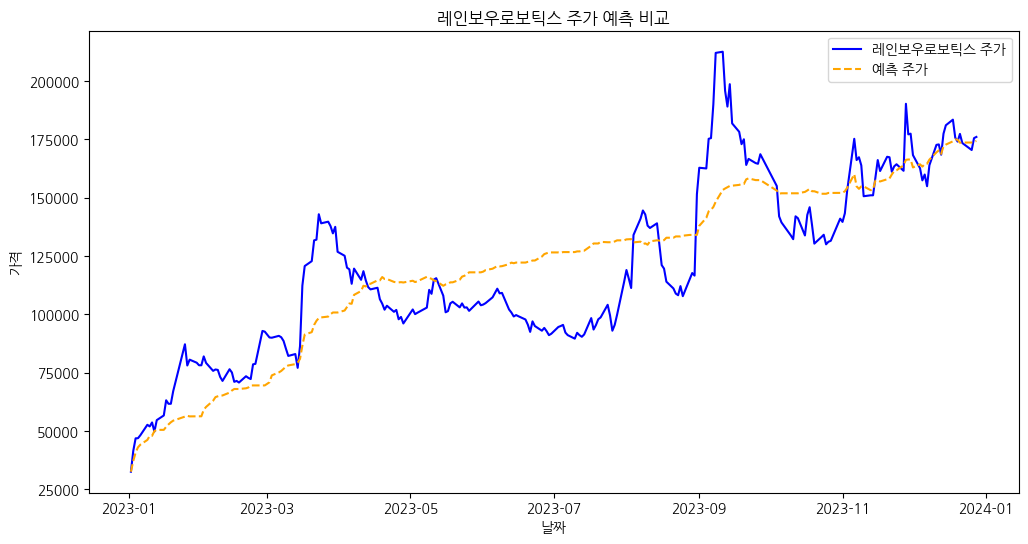

In [7]:
import random
import koreanize_matplotlib
from datetime import datetime, timedelta
import FinanceDataReader as fdr

company = "레인보우로보틱스"

sentiment_result = pd.read_csv("../sentiment_analysis/data/predicted/레인보우로보틱스/predicted_레인보우로보틱스_2023.csv") # 감성분석 결과 csv파일 읽어오기

# 'Date' 열을 datetime 형식으로 변환
sentiment_result['date'] = pd.to_datetime(sentiment_result['date'])
sentiment_result["date"] = sentiment_result["date"].dt.date

# 데이터 형태 갖추기
sentiments_data = []

for index, row in sentiment_result.iterrows():
    date = row['date']
    prediction = row['prediction']
    score = row['score']
    sentiments_data.append([date, company, prediction, score])

sentiments_df2 = pd.DataFrame(sentiments_data, columns=['date', 'company', 'prediction', 'score'])

# 감성에 따른 가중치 매핑
weights = {'호재': 1, '악재': -1, '중립': 0}
sentiments_df2['total'] = sentiments_df2['prediction'].map(weights) * sentiments_df2['score']

# 중복된 날짜에 대해 합치기
df_rb = sentiments_df2.groupby(['date', 'company']).agg({'total': 'sum'}).reset_index()

# LG전자만 남기기
df_rb = df_rb[df_rb['company'] == '레인보우로보틱스'].copy()

# 'Date' 열을 datetime 타입으로 변환
df_rb['date'] = pd.to_datetime(df_rb['date'])

# 'Date' 레벨을 주식 데이터의 인덱스로 설정
df_rb = df_rb.set_index('date')

# 주가 데이터 가져오기
rb_stock = fdr.DataReader('277810', '2023-01-01', '2023-12-31')

# 주가 데이터에 감성분석 결과 총점을 추가
rb_stock['Sentiment_Total'] = df_rb['total']

# NaN 값을 0으로 대체
rb_stock['Sentiment_Total'] = rb_stock['Sentiment_Total'].fillna(0)

# 감성분석 결과의 크기를 늘리기
scaling_factor = 58
rb_stock['Sentiment_Total'] = rb_stock['Sentiment_Total'] * scaling_factor

# 누적 합 계산
rb_stock['Sentiment_Total_Cumulative'] = rb_stock['Sentiment_Total'].cumsum()

# 오프셋 설정
offset = 32600
rb_stock['Sentiment_Total_Cumulative_Offset'] = rb_stock['Sentiment_Total_Cumulative'] + offset

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(rb_stock['Close'], label='레인보우로보틱스 주가', color='blue')
plt.plot(rb_stock['Sentiment_Total_Cumulative_Offset'], label='예측 주가', linestyle='--', color='orange')
plt.title('레인보우로보틱스 주가 예측 비교')
plt.xlabel('날짜')
plt.ylabel('가격')
plt.legend()
plt.show()

In [8]:
rb_stock

,Open,High,Low,Close,Volume,Change,Sentiment_Total,Sentiment_Total_Cumulative,Sentiment_Total_Cumulative_Offset
Date,,,,,,,,,
2023-01-02,34650,34950,32000,32600,537307,-0.053701,0.000000,0.000000,32600.000000
2023-01-03,37600,42350,35700,41550,12696270,0.274540,4624.666044,4624.666044,37224.666044
2023-01-04,42550,47350,41550,46900,7817245,0.128761,3573.151786,8197.817830,40797.817830
2023-01-05,46050,50200,45650,46950,5728586,0.001066,2250.127373,10447.945203,43047.945203
2023-01-06,46500,53600,46450,48200,6654312,0.026624,1128.886362,11576.831564,44176.831564
...,...,...,...,...,...,...,...,...,...
2023-12-21,172000,184300,170100,177300,881801,0.018966,-1303.158391,140934.972000,173534.972000
2023-12-22,179100,179300,172900,173400,309638,-0.021997,60.591585,140995.563585,173595.563585
2023-12-26,173000,173000,167600,170400,282521,-0.017301,0.000000,140995.563585,173595.563585


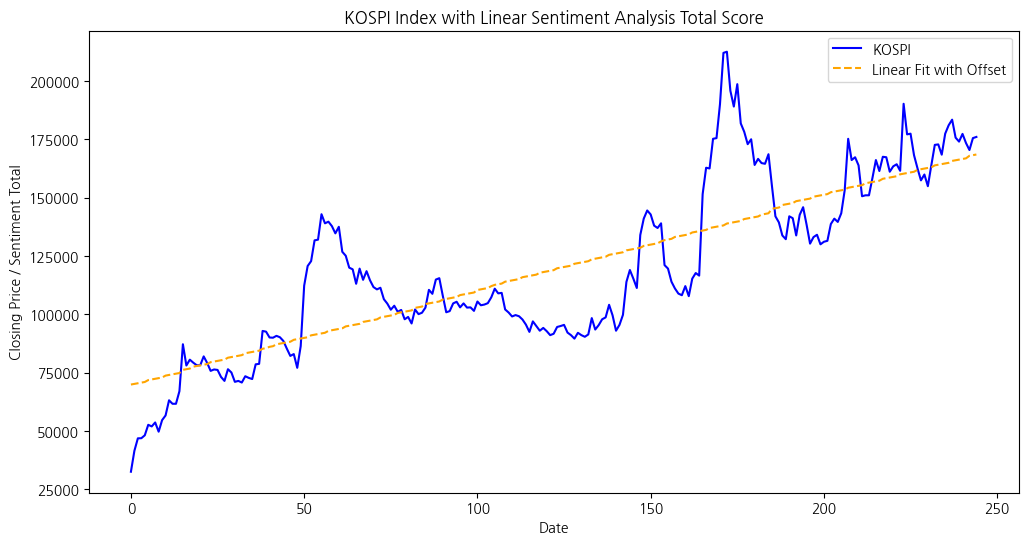

In [9]:
import FinanceDataReader as fdr
import seaborn as sns
import matplotlib.pyplot as plt

# 주가 데이터 가져오기
rb_stock = fdr.DataReader('277810', '2023-01-01', '2023-12-31')

# 감성분석 결과의 크기를 조절
scaling_factor = 58
df_rb['Sentiment_Total'] = df_rb['total'] * scaling_factor

# 날짜를 기준으로 정렬
rb_stock = rb_stock.sort_index()
df_rb = df_rb.sort_index()

# 날짜를 일로 나타내는 정수로 변환
rb_stock['Date_Integer'] = (rb_stock.index - rb_stock.index.min()).days
df_rb['Date_Integer'] = (df_rb.index - df_rb.index.min()).days

# 주식 데이터와 감성분석 결과를 합침
merged_data = pd.merge(rb_stock, df_rb, left_on='Date_Integer', right_on='Date_Integer', how='left')

# NaN 값을 0으로 대체합니다.
merged_data['Sentiment_Total'] = merged_data['Sentiment_Total'].fillna(0)

# 감성분석 결과를 기반으로한 1차 함수의 계수 계산
coeff = np.polyfit(merged_data['Date_Integer'], merged_data['Sentiment_Total'].cumsum(), 1)

# 1차 함수의 y값 계산하여 추가
merged_data['Sentiment_Linear'] = np.polyval(coeff, merged_data['Date_Integer'])

# 오프셋 설정
offset = merged_data['Close'].mean() - merged_data['Sentiment_Linear'].iloc[len(merged_data) // 2]
merged_data['Sentiment_Linear_Offset'] = merged_data['Sentiment_Linear'] + offset

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Close'], label='KOSPI', color='blue')
plt.plot(merged_data['Sentiment_Linear_Offset'], label='Linear Fit with Offset', linestyle='--', color='orange')
plt.title('KOSPI Index with Linear Sentiment Analysis Total Score')
plt.xlabel('Date')
plt.ylabel('Closing Price / Sentiment Total')
plt.legend()
plt.show()


In [11]:
import pandas as pd
import cufflinks as cf
import numpy as np
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")
cf.set_config_file(theme='pearl', world_readable=False)
cf.go_offline()
single_stock = fdr.DataReader('277810', '2023-01-01', '2023-12-31')
single_stock['Close'].iplot(title='RB Returns', bestfit=True, bestfit_colors=['blue']) # 수익률 시각화, bestfit:최적 경향선 추가(추세 파악 용이)